# Peripheral Blood Cell Classification using CNN
This notebook demonstrates the classification of peripheral blood cells using Convolutional Neural Networks (CNNs).

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


## 1. Load the Dataset
We will load the dataset and split it into training and testing sets.
Dataset: https://www.kaggle.com/datasets/unclesamulus/blood-cells-image-dataset

In [2]:
# Path to the dataset
dataset_path = '/kaggle/input/blood-cells-image-dataset/bloodcells_dataset'
# Load images using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(360, 360),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(360, 360),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 13677 images belonging to 8 classes.
Found 3415 images belonging to 8 classes.


## 2. Build the CNN Model
We will build a CNN model with Conv2D, MaxPooling2D, and Dense layers.

In [3]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(360, 360, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 358, 358, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 179, 179, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 177, 177, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 88, 88, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 86, 86, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 43, 43, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 236672)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    30,294,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,388,424 (115.92 MB)

 Trainable params: 30,388,424 (115.92 MB)

 Non-trainable params: 0 (0.00 B)

## 3. Train the Model
Train the CNN on the blood cell dataset using an 80-20 split.

In [4]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729709375.489360      82 service.cc:145] XLA service 0x7f6694003910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729709375.489413      82 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729709375.489417      82 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/428 ━━━━━━━━━━━━━━━━━━━━ 45s 107ms/step - accuracy: 0.1250 - loss: 4.9216  

I0000 00:00:1729709388.422507      82 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


428/428 ━━━━━━━━━━━━━━━━━━━━ 166s 350ms/step - accuracy: 0.3787 - loss: 1.8935 - val_accuracy: 0.7473 - val_loss: 0.7623
Epoch 2/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 80s 185ms/step - accuracy: 0.7419 - loss: 0.7172 - val_accuracy: 0.8111 - val_loss: 0.5419
Epoch 3/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 81s 187ms/step - accuracy: 0.8374 - loss: 0.4565 - val_accuracy: 0.8474 - val_loss: 0.4272
Epoch 4/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 80s 185ms/step - accuracy: 0.8649 - loss: 0.3851 - val_accuracy: 0.8697 - val_loss: 0.3600
Epoch 5/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 81s 183ms/step - accuracy: 0.8745 - loss: 0.3494 - val_accuracy: 0.8395 - val_loss: 0.4725
Epoch 6/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 81s 186ms/step - accuracy: 0.9082 - loss: 0.2595 - val_accuracy: 0.9022 - val_loss: 0.3026
Epoch 7/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 79s 183ms/step - accuracy: 0.9155 - loss: 0.2276 - val_accuracy: 0.8855 - val_loss: 0.4432
Epoch 8/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 80s 184ms/step - accuracy: 0.9346 - loss: 0.1939 - va

## 4. Evaluate the Model
Evaluate the performance using accuracy, precision, recall, and confusion matrices.

107/107 ━━━━━━━━━━━━━━━━━━━━ 16s 143ms/step


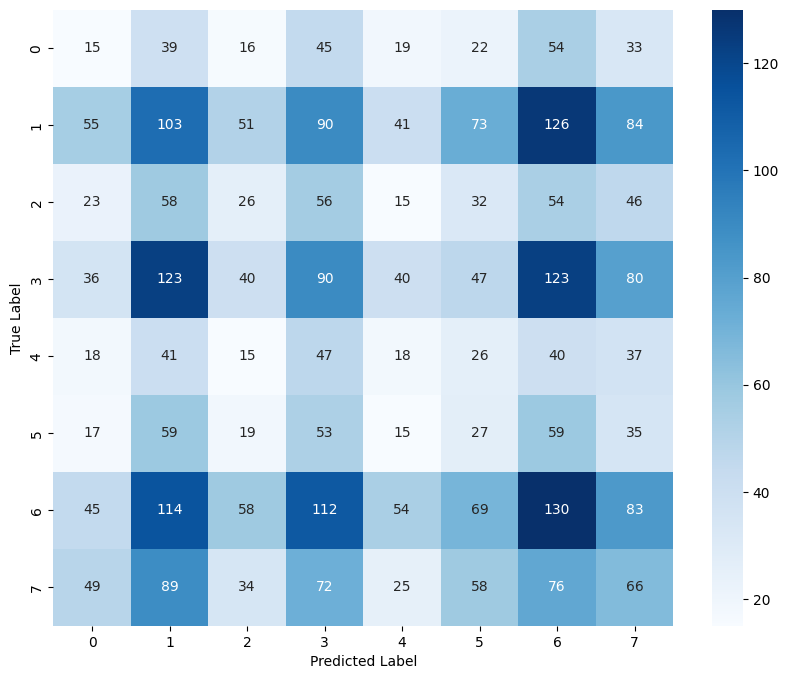

Classification Report
                      precision    recall  f1-score   support

          Neutrophil       0.06      0.06      0.06       243
          Eosinophil       0.16      0.17      0.16       623
            Basophil       0.10      0.08      0.09       310
          Lymphocyte       0.16      0.16      0.16       579
            Monocyte       0.08      0.07      0.08       242
Immature Granulocyte       0.08      0.10      0.08       284
        Erythroblast       0.20      0.20      0.20       665
            Platelet       0.14      0.14      0.14       469

            accuracy                           0.14      3415
           macro avg       0.12      0.12      0.12      3415
        weighted avg       0.14      0.14      0.14      3415



In [5]:
# Evaluate model performance
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print('Classification Report')
target_names = ['Neutrophil', 'Eosinophil', 'Basophil', 'Lymphocyte', 'Monocyte', 'Immature Granulocyte', 'Erythroblast', 'Platelet']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [6]:
model.save('simpleCNNmodel_01.h5')